In [90]:
import pandas as pd

data = pd.read_csv('hour.csv')

In [91]:
# Display basic information about the dataset

print("\nSample data:\n", data.head())


Sample data:
    instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [92]:
print("Shape of the data:", data.shape)
print("\nColumn names:\n", data.columns)
print("\nData types of columns:\n", data.dtypes)
print("\nBasic statistics:\n", data.describe())

Shape of the data: (17379, 17)

Column names:
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Data types of columns:
 instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Basic statistics:
           instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   

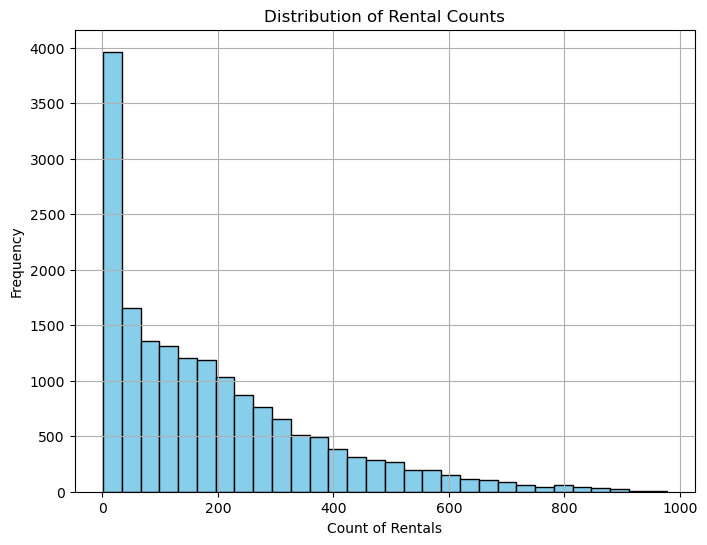

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(data['cnt'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Count of Rentals')
plt.ylabel('Frequency')
plt.title('Distribution of Rental Counts')
plt.grid(True)
plt.show()

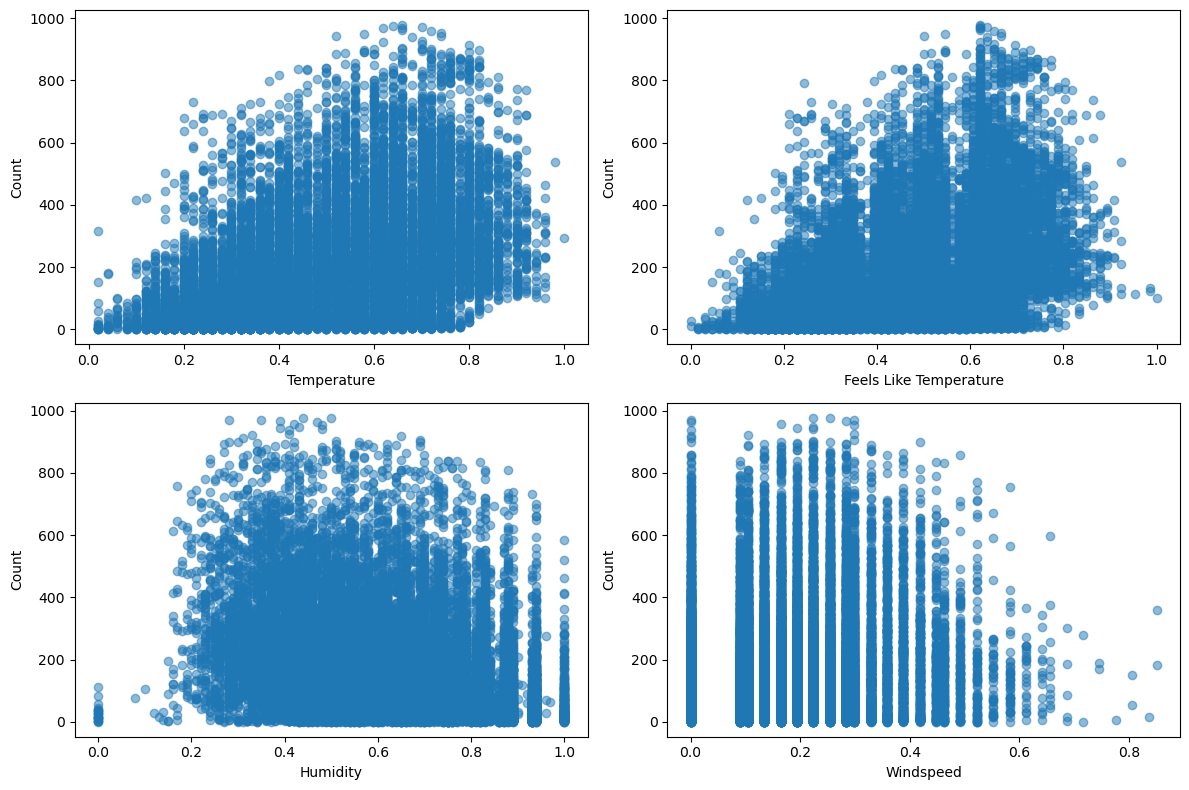

In [94]:
# Scatter plots for continuous variables against 'cnt'
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(data['temp'], data['cnt'], alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
plt.scatter(data['atemp'], data['cnt'], alpha=0.5)
plt.xlabel('Feels Like Temperature')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
plt.scatter(data['hum'], data['cnt'], alpha=0.5)
plt.xlabel('Humidity')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
plt.scatter(data['windspeed'], data['cnt'], alpha=0.5)
plt.xlabel('Windspeed')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


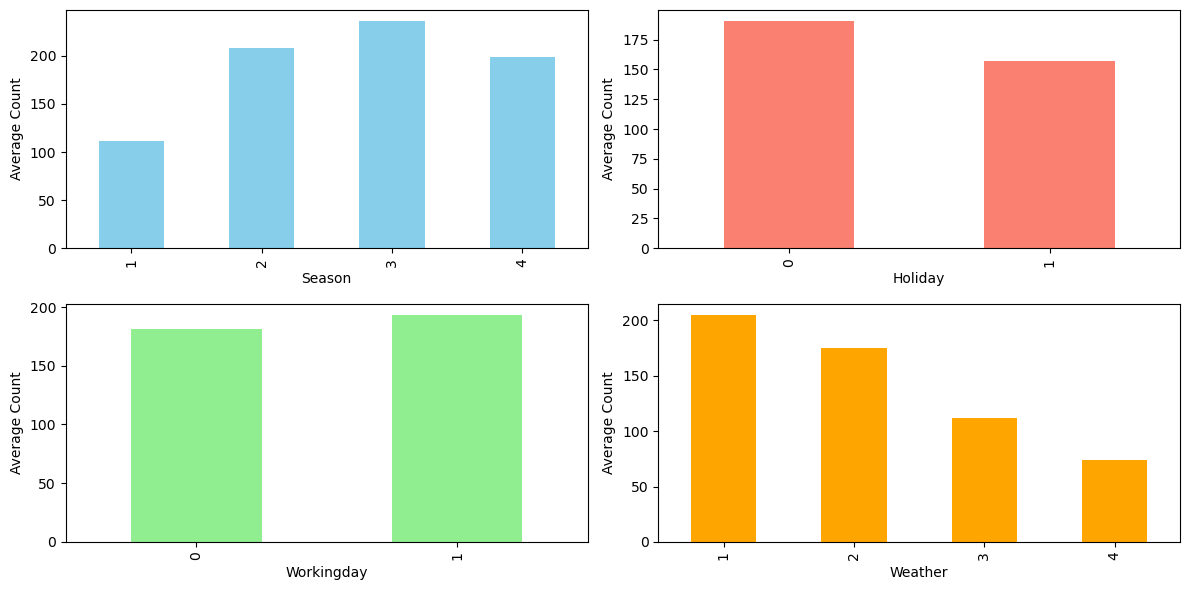

In [95]:
# Bar plots for categorical variables against 'cnt'
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
data.groupby('season')['cnt'].mean().plot(kind='bar', color='skyblue')
plt.xlabel('Season')
plt.ylabel('Average Count')

plt.subplot(2, 2, 2)
data.groupby('holiday')['cnt'].mean().plot(kind='bar', color='salmon')
plt.xlabel('Holiday')
plt.ylabel('Average Count')

plt.subplot(2, 2, 3)
data.groupby('workingday')['cnt'].mean().plot(kind='bar', color='lightgreen')
plt.xlabel('Workingday')
plt.ylabel('Average Count')

plt.subplot(2, 2, 4)
data.groupby('weathersit')['cnt'].mean().plot(kind='bar', color='orange')
plt.xlabel('Weather')
plt.ylabel('Average Count')

plt.tight_layout()
plt.show()


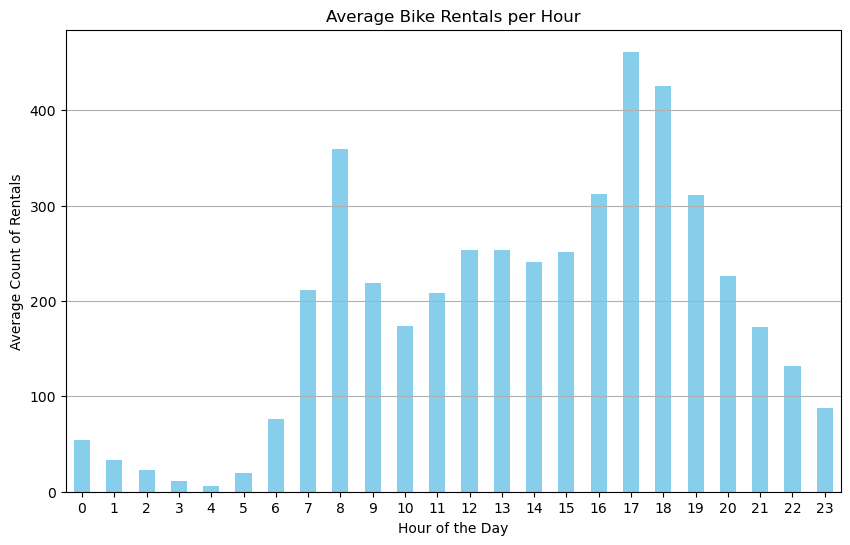

In [96]:
# Grouping by 'hr' and calculating the average count for each hour
hourly_counts = data.groupby('hr')['cnt'].mean()

# Plotting the average count of rentals per hour
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Average Bike Rentals per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count of Rentals')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



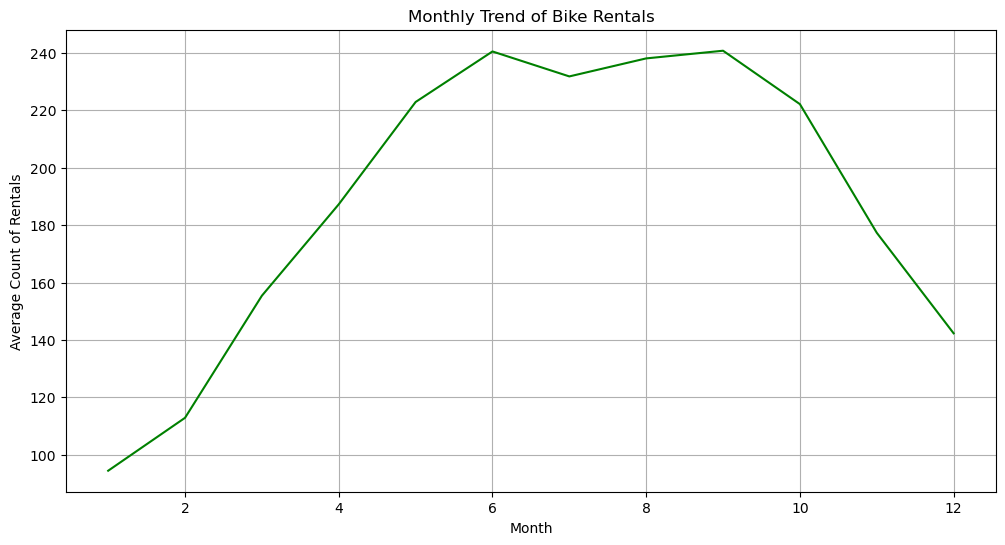

In [97]:
# Grouping by 'mnth' and calculating the average count for each month
monthly_counts = data.groupby('mnth')['cnt'].mean()

# Plotting the time series of count vs. month
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index, monthly_counts.values, color='green')
plt.title('Monthly Trend of Bike Rentals')
plt.xlabel('Month')
plt.ylabel('Average Count of Rentals')
plt.grid(True)
plt.show()

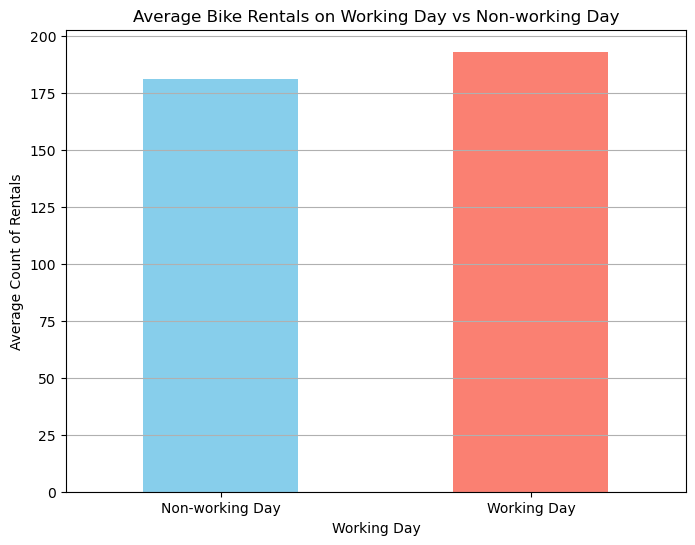

In [98]:
# Grouping by 'workingday' and calculating the average count for working and non-working days
workingday_counts = data.groupby('workingday')['cnt'].mean()

# Plotting the bar graph of average count on working and non-working days
plt.figure(figsize=(8, 6))
workingday_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Bike Rentals on Working Day vs Non-working Day')
plt.xlabel('Working Day')
plt.ylabel('Average Count of Rentals')
plt.xticks([0, 1], ['Non-working Day', 'Working Day'], rotation=0)
plt.grid(axis='y')
plt.show()

In [99]:
data.drop(columns=['dteday'])

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [100]:
print(data.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [101]:
from sklearn.preprocessing import LabelEncoder

# Columns to be label encoded
columns_to_label_encode = ['season', 'holiday', 'weathersit']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in columns_to_label_encode:
    data[col + '_label_encoded'] = label_encoder.fit_transform(data[col])



In [163]:
# Categorical columns for one-hot encoding
categorical_cols = ['season', 'holiday', 'weathersit']

# Apply one-hot encoding to training and test data
encoded_X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
encoded_X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Initialize and fit the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(encoded_X_train, y_train)


LinearRegression()

In [164]:
print(data.head())

   season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0       1   0     1   0        0        6           0           1  0.24   
1       1   0     1   1        0        6           0           1  0.22   
2       1   0     1   2        0        6           0           1  0.22   
3       1   0     1   3        0        6           0           1  0.24   
4       1   0     1   4        0        6           0           1  0.24   

    atemp   hum  windspeed  cnt  season_label_encoded  holiday_label_encoded  \
0  0.2879  0.81        0.0   16                     0                      0   
1  0.2727  0.80        0.0   40                     0                      0   
2  0.2727  0.80        0.0   32                     0                      0   
3  0.2879  0.75        0.0   13                     0                      0   
4  0.2879  0.75        0.0    1                     0                      0   

   weathersit_label_encoded  transform_count  
0                    

In [196]:
#data=data.drop(columns=['dteday'])

In [166]:
print(data.head())

   season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0       1   0     1   0        0        6           0           1  0.24   
1       1   0     1   1        0        6           0           1  0.22   
2       1   0     1   2        0        6           0           1  0.22   
3       1   0     1   3        0        6           0           1  0.24   
4       1   0     1   4        0        6           0           1  0.24   

    atemp   hum  windspeed  cnt  season_label_encoded  holiday_label_encoded  \
0  0.2879  0.81        0.0   16                     0                      0   
1  0.2727  0.80        0.0   40                     0                      0   
2  0.2727  0.80        0.0   32                     0                      0   
3  0.2879  0.75        0.0   13                     0                      0   
4  0.2879  0.75        0.0    1                     0                      0   

   weathersit_label_encoded  transform_count  
0                    

In [167]:
# Drop 'casual' and 'registered' columns from df_encoded_data
columns_to_drop = ['casual', 'registered','instant']
data =data.drop(columns=columns_to_drop, errors='ignore')

In [168]:
print(data.head())

   season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0       1   0     1   0        0        6           0           1  0.24   
1       1   0     1   1        0        6           0           1  0.22   
2       1   0     1   2        0        6           0           1  0.22   
3       1   0     1   3        0        6           0           1  0.24   
4       1   0     1   4        0        6           0           1  0.24   

    atemp   hum  windspeed  cnt  season_label_encoded  holiday_label_encoded  \
0  0.2879  0.81        0.0   16                     0                      0   
1  0.2727  0.80        0.0   40                     0                      0   
2  0.2727  0.80        0.0   32                     0                      0   
3  0.2879  0.75        0.0   13                     0                      0   
4  0.2879  0.75        0.0    1                     0                      0   

   weathersit_label_encoded  transform_count  
0                    

In [169]:
print(data.columns)

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_label_encoded', 'holiday_label_encoded',
       'weathersit_label_encoded', 'transform_count'],
      dtype='object')


In [170]:
import numpy as np
data['transform_count']=np.log1p(data['cnt'])
print(data.head())

   season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0       1   0     1   0        0        6           0           1  0.24   
1       1   0     1   1        0        6           0           1  0.22   
2       1   0     1   2        0        6           0           1  0.22   
3       1   0     1   3        0        6           0           1  0.24   
4       1   0     1   4        0        6           0           1  0.24   

    atemp   hum  windspeed  cnt  season_label_encoded  holiday_label_encoded  \
0  0.2879  0.81        0.0   16                     0                      0   
1  0.2727  0.80        0.0   40                     0                      0   
2  0.2727  0.80        0.0   32                     0                      0   
3  0.2879  0.75        0.0   13                     0                      0   
4  0.2879  0.75        0.0    1                     0                      0   

   weathersit_label_encoded  transform_count  
0                    

In [171]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data.drop(columns=['cnt','transform_count'])  # Features
y = data['transform_count']  # Target variable

# Split the data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (12165, 15)
X_test shape: (5214, 15)
y_train shape: (12165,)
y_test shape: (5214,)


In [172]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor


In [173]:
# Initialize Linear Regression model
linear_reg = LinearRegression()

# Fit the model
linear_reg.fit(X_train, y_train)


LinearRegression()

In [174]:

print("Linear Regression Best Score:", linear_reg.score(X_test, y_test))

Linear Regression Best Score: 0.4841712902569363


In [175]:
predictions = linear_reg.predict(X_test)


In [176]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 1.0373352268426688
Mean Absolute Error (MAE): 0.8047360124129563
R-squared (R2): 0.4841712902569363


In [177]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


In [178]:
# Assuming you have your features stored in X and target variable in y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [179]:
# Initialize Decision Tree Regressor
dt_reg = DecisionTreeRegressor()

# Fit the model
dt_reg.fit(X_train, y_train)


DecisionTreeRegressor()

In [180]:
# Predict on the test set
y_pred = dt_reg.predict(X_test)


In [181]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 0.20448854230678484
Mean Absolute Error: 0.2939775850976774
R-squared: 0.898315358231494


In [182]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


In [183]:
# Assuming you have your features stored in X and target variable in y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [184]:
# Initialize XGBoost model
xgb_reg = XGBRegressor()

# Fit the model
xgb_reg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [185]:
# Predict on the test set
y_pred = xgb_reg.predict(X_test)


In [186]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 0.08903284590554413
Mean Absolute Error: 0.20131910560493727
R-squared: 0.9557272356709666


In [187]:
#XGBoost seems to be the best-performing model

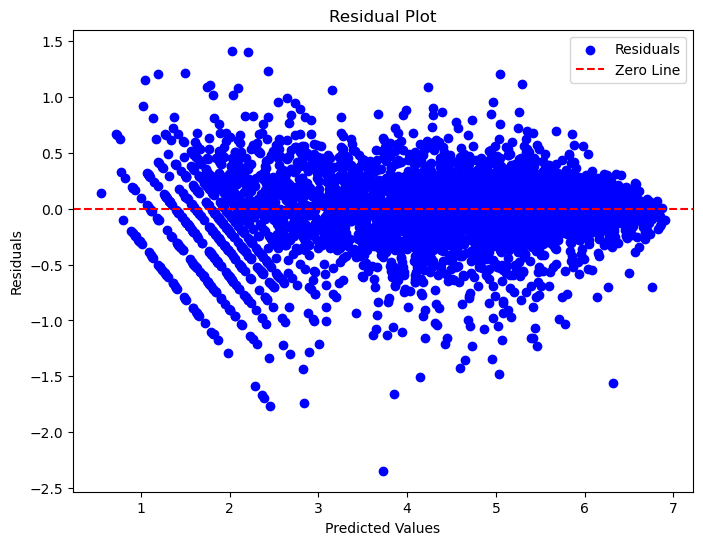

In [188]:
import matplotlib.pyplot as plt

# Assuming y_test is the actual test values and y_pred is the predicted values
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, c='blue', marker='o', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')

plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.legend()
plt.show()


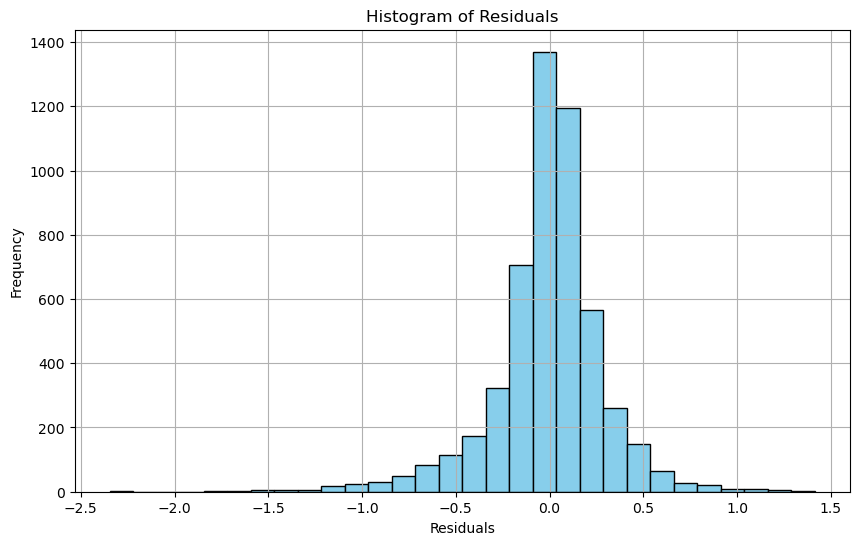

In [189]:
import matplotlib.pyplot as plt

# Assuming y_test is the actual test values and y_pred is the predicted values
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30,color='skyblue', edgecolor='black')

plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)

plt.show()


In [190]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Assuming X and y are your features and target variable

# Linear Regression
linear_reg = LinearRegression()
linear_scores = cross_val_score(linear_reg, X, y, cv=5, scoring='r2')
print("Linear Regression Cross-Validated R-squared:", linear_scores.mean())

# Decision Tree
tree_reg = DecisionTreeRegressor()
tree_scores = cross_val_score(tree_reg, X, y, cv=5, scoring='r2')
print("Decision Tree Cross-Validated R-squared:", tree_scores.mean())

# XGBoost
xgb_reg = XGBRegressor()
xgb_scores = cross_val_score(xgb_reg, X, y, cv=5, scoring='r2')
print("XGBoost Cross-Validated R-squared:", xgb_scores.mean())


Linear Regression Cross-Validated R-squared: 0.4410614076132905
Decision Tree Cross-Validated R-squared: 0.8115063865227471
XGBoost Cross-Validated R-squared: 0.9132851973822872


In [191]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# Assuming X and y are your features and target variable

# Initialize XGBoost model
xgb_reg = XGBRegressor()

# Perform 10-fold cross-validation
xgb_scores = cross_val_score(xgb_reg, X, y, cv=10, scoring='r2')
print("XGBoost 10-fold Cross-Validated R-squared:", xgb_scores.mean())


XGBoost 10-fold Cross-Validated R-squared: 0.9196464083560107


In [192]:
#XGboost is best ML algorithm for required model

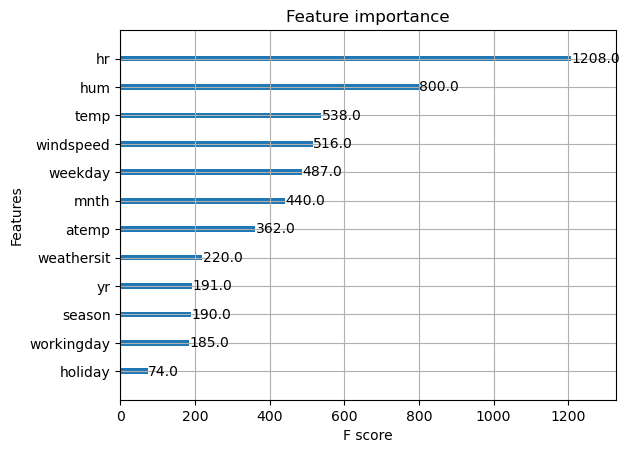

Feature Importance Ranking:
hr: 0.4081730842590332
workingday: 0.21243277192115784
yr: 0.10219017416238785
season: 0.0822305679321289
temp: 0.07163029164075851
weathersit: 0.040679484605789185
atemp: 0.02295641042292118
weekday: 0.01453307457268238
holiday: 0.014093607664108276
mnth: 0.013202302157878876
hum: 0.011873000301420689
windspeed: 0.006005238741636276
season_label_encoded: 0.0
holiday_label_encoded: 0.0
weathersit_label_encoded: 0.0


In [193]:
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Assuming you have X_train and y_train ready for training
xgb_model = xgb.XGBRegressor()  # Initialize XGBoost model
xgb_model.fit(X_train, y_train)  # Fit the model

# Plotting feature importance
plot_importance(xgb_model)
plt.show()

# Accessing feature importance values directly
feature_importance = xgb_model.feature_importances_

# Mapping feature importance scores to respective column names
feature_names = X_train.columns
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sorting features by their importance values
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
print("Feature Importance Ranking:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")


In [194]:
#hr is the most important feature